## Recoding Kuramoto for Random initial values for a Fully connected network (Runge-Kutta method)
+ ### order parameter vs time plot
#### Date: Tir 1402

Kuramoto model described by this equation:
$$
\frac{d\theta_i}{dt} = \omega_i + \frac{K}{N}\sum_{j=1}^N A_{ij}\sin(\theta_j - \theta_i),\quad i = 1, \dots, N
$$
Also the order parameter defined by:
$$
r = \frac{1}{N} \sum_{j=1}^{N} e^{i\theta_j}
$$

In [42]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [43]:
#Initial values

N=200                                                           # Number of nodes (oscillators)

mu, sigma = 0, 1                                                # Parameters for normal distribution
omega = np.random.normal(mu, sigma, size=N)                     # Natural frequencies

theta_initial = np.random.uniform(0, 2*np.pi, size=N)           # Initial phase angles for  t=0
theta=np.zeros(N)

#How to make adjancy matrix of a fully connected network?
#Create an Erdos_Renyi network with probability 1.
G=nx.erdos_renyi_graph(N, 1)                                    # Erdos_renyi_graph(n:number of nodes, probability, seed=None, directed=False)
# Get the adjacency matrix
print("the adjacency matrix is:")
Adj = nx.adjacency_matrix(G).todense()                          # A is adjecency matrix
print(Adj)

the adjacency matrix is:
[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


In [13]:
#rk
'''def rk4(f, y0, x0, xf, h):
    x = np.arange(x0, xf+h, h)
    n=len(x)
    m=len(y0)
    y = np.zeros((n,m))
    y[0] = y0

    for i in range (1, len(x)):
        k1 = h * f(x[i-1] , y[i-1])
        k2 = h * f(x[i-1]+ h/2 , y[i-1]+ k1/2 )
        k3 = h * f(x[i-1]+ h/2 , y[i-1]+ k2/2)
        k4 = h * f(x[i-1]+ h ,  y[i-1]+ k3,couplig,matrix)
        y[i] = y[i-1] + (1/6)*(k1 +2*k2 + 2*k3 + k4)

    return x , y'''

'def rk4(f, y0, x0, xf, h):\n    x = np.arange(x0, xf+h, h)\n    n=len(x)\n    m=len(y0)\n    y = np.zeros((n,m))\n    y[0] = y0\n\n    for i in range (1, len(x)):\n        k1 = h * f(x[i-1] , y[i-1])\n        k2 = h * f(x[i-1]+ h/2 , y[i-1]+ k1/2 )\n        k3 = h * f(x[i-1]+ h/2 , y[i-1]+ k2/2)\n        k4 = h * f(x[i-1]+ h ,  y[i-1]+ k3,couplig,matrix)\n        y[i] = y[i-1] + (1/6)*(k1 +2*k2 + 2*k3 + k4)\n\n    return x , y'

 Kuramoto equation is:
$$
\frac{d\theta_i}{dt} = \omega_i + \frac{K}{N}\sum_{j=1}^N A_{ij}\sin(\theta_j - \theta_i),\quad i = 1, \dots, N
$$

In [14]:
def Kuramoto (w, theta, K, A):
    N=len(theta)
    dtheta_dt=np.zeros(N)
    for i in range (0,N,1):
        Sigma=0
        for j in range (0,N,1):
            Sigma=Sigma+A[i][j]*np.sin(theta[j]-theta[i])
        dtheta_dt[i]=w[i]+(K/N)*Sigma
    return dtheta_dt

$$ r=R e^{i\psi} = \frac{1}{N} \sum_{j=1}^N e^{i\theta_j} = \frac{1}{N} \left(\sum_{j=1}^N \cos\theta_j + i\sum_{j=1}^N \sin\theta_j\right) $$

$$ r \cos\psi = \frac{1}{N} \sum_{j=1}^N \cos\theta_j $$

$$ r \sin\psi = \frac{1}{N} \sum_{j=1}^N \sin\theta_j $$

$$ r = \sqrt{\left(\frac{1}{N} \sum_{j=1}^N \cos\theta_j\right)^2 + \left(\frac{1}{N} \sum_{j=1}^N \sin\theta_j\right)^2} $$

In [15]:
# Define the order parameter function
def order_parameter (theta):
    N=len(theta)
    r_cos=0
    r_sin=0
    r=0
    r_cos=(1/N)*sum(np.cos(theta))
    r_sin=(1/N)*sum(np.sin(theta))
    r=np.sqrt(pow(r_cos,2)+pow(r_sin,2))
    return r

In [16]:
# Total order parameter value for each coupling strength
def r_total(r):
    count=0
    order_parameter=0
    n_step=len(r)
    for i in range (int((4/5)*n_step),n_step):
        order_parameter=order_parameter+r[i]
        count=count+1
    return (order_parameter/count)

In [44]:
import time
start_time = time.time()  # get the start time

t_final=5000
dt=0.01
coupling=1.5                                                      # Change k =[0.016 , 3.52]    dk=0.5
theta_old=np.zeros(N)
theta_new=np.zeros(N)
theta_old=theta_initial

syncrony=np.zeros(5000)


with open('Saved/r_t/data_k='+str(coupling)+'.txt', 'w') as file:
    # Time evolution of phases
    for t in range (0,t_final,1):
        k1 = dt * Kuramoto(omega, theta_old, coupling, Adj)
        k2 = dt * Kuramoto(omega, theta_old + k1/2, coupling, Adj)
        k3 = dt * Kuramoto(omega, theta_old + k2/2, coupling, Adj)
        k4 = dt * Kuramoto(omega, theta_old + k3, coupling, Adj)
        theta_new = theta_old + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        #theta_new=theta_old+Kuramoto(omega, theta_old, coupling, Adj)*dt
        theta_old=theta_new
        syncrony[t]=order_parameter(theta_new)
        file.write(f'{t}\t{syncrony[t]}\n')



end_time = time.time()  # get the end time
elapsed_time = end_time - start_time  # calculate the elapsed time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 1858.9561614990234 seconds


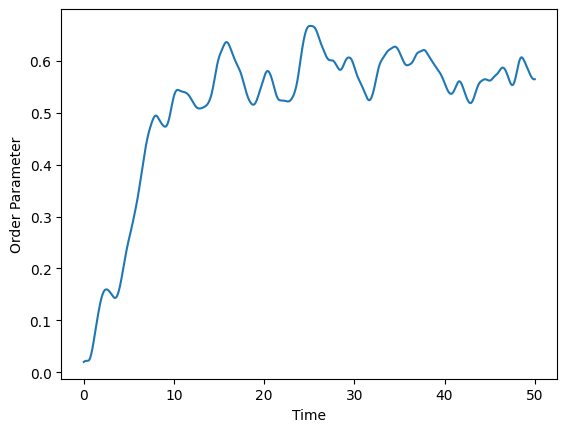

In [45]:
# Plot order parameter vs time
time=np.linspace(dt,t_final*dt,t_final)
plt.plot(time,syncrony)
plt.xlabel('Time')
plt.ylabel('Order Parameter')
plt.show()
#np.savetxt('R_new.txt', synchrny,'%f3')    #save synchrony in a txt file with 3 decimal places.